In [153]:
%matplotlib inline

# Red wine regression

Prédire la qualité d'un vin à partir de ses composés chimiques.

In [154]:
import numpy as np

In [155]:
np.random.seed(42)  # fixe le random

In [156]:
import pandas as pd

In [157]:
url = "https://gist.githubusercontent.com/jsz4n/b7ca11015784086788022a539935d0cf/raw/a8c3abf0a31f5c0df5e0ddd76fb9b289bac9bed1/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Analyse de corrélations/distributions

In [159]:
df_corr = df.corr()

In [160]:
df_corr[df_corr.abs()>0.6]

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000               NaN     0.671703   
volatile acidity                NaN               1.0          NaN   
citric acid                0.671703               NaN     1.000000   
residual sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.668047               NaN          NaN   
pH                        -0.682978               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   
quality                         NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                    NaN        NaN                  NaN   
volatile acidity                 NaN        NaN                  NaN   
citric acid                      NaN        NaN                  NaN   
residual sugar                   1.0        NaN                  NaN   
chlorides                        NaN        1.0                  NaN   
free sulfur dioxide              NaN        NaN             1.000000   
total sulfur dioxide             NaN        NaN             0.667666   
density                          NaN        NaN                  NaN   
pH                               NaN        NaN                  NaN   
sulphates                        NaN        NaN                  NaN   
alcohol                          NaN        NaN                  NaN   
quality                          NaN        NaN                  NaN   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                          NaN  0.668047 -0.682978        NaN   
volatile acidity                       NaN       NaN       NaN        NaN   
citric acid                            NaN       NaN       NaN        NaN   
residual sugar                         NaN       NaN       NaN        NaN   
chlorides                              NaN       NaN       NaN        NaN   
free sulfur dioxide               0.667666       NaN       NaN        NaN   
total sulfur dioxide              1.000000       NaN       NaN        NaN   
density                                NaN  1.000000       NaN        NaN   
pH                                     NaN       NaN  1.000000        NaN   
sulphates                              NaN       NaN       NaN        1.0   
alcohol                                NaN       NaN       NaN        NaN   
quality                                NaN       NaN       NaN        NaN   

                      alcohol  quality  
fixed acidity             NaN      NaN  
volatile acidity          NaN      NaN  
citric acid               NaN      NaN  
residual sugar            NaN      NaN  
chlorides                 NaN      NaN  
free sulfur dioxide       NaN      NaN  
total sulfur dioxide      NaN      NaN  
density                   NaN      NaN  
pH                        NaN      NaN  
sulphates                 NaN      NaN  
alcohol                   1.0      NaN  
quality                   NaN      1.0

En utilisant des filtre on remarque des |correlations| > 0.65 entre fixed acidity, ph et density, mais aussi entre les free/total sulfur dioxide.

<Axes: xlabel='quality', ylabel='fixed acidity'>

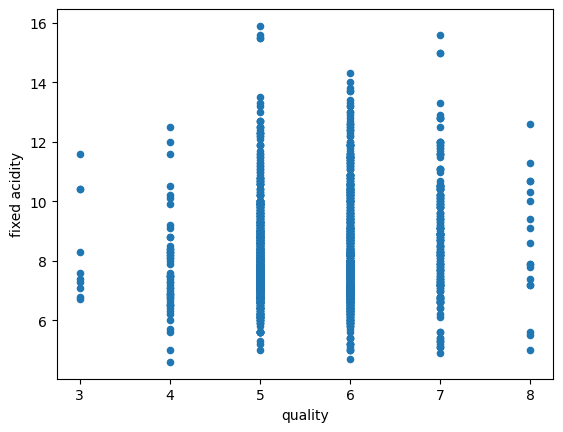

In [161]:
df.plot(kind="scatter", x="quality", y="fixed acidity") # l'ideal est d'avoir un boxplot

en regardant les distributions de la densité et des l'alcohol on remarque que certaines parties des deux features peuvent être importantes.

### Normalisation des features numeriques

In [162]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [163]:
categorical_features = []
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [164]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [165]:
scaler = StandardScaler()
scaler.fit(df[numerical_features])

StandardScaler()

In [166]:
X = pd.DataFrame(scaler.transform(df[numerical_features]), columns=numerical_features)

In [167]:
y = df.copy()["quality"]

In [168]:
# X["sulfure"] = X["free sulfur dioxide"]+X["total sulfur dioxide"] # ne fait pas gagner grand chose.

In [169]:
X.pop("fixed acidity") # nous fait gagner 0.03 de r2

0      -0.528360
1      -0.298547
2      -0.298547
3       1.654856
4      -0.528360
          ...   
1594   -1.217796
1595   -1.390155
1596   -1.160343
1597   -1.390155
1598   -1.332702
Name: fixed acidity, Length: 1599, dtype: float64

In [170]:
# X.drop(["free sulfur dioxide","total sulfur dioxide", "fixed acidity"], axis=1, inplace=True)

In [171]:
X.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0          0.961877    -1.391472       -0.453218  -0.243707   
1          1.967442    -1.391472        0.043416   0.223875   
2          1.297065    -1.186070       -0.169427   0.096353   
3         -1.384443     1.484154       -0.453218  -0.264960   
4          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [172]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Modélisation

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
from sklearn.linear_model import ElasticNet, LinearRegression

In [176]:
reg = ElasticNet(alpha=0.1, l1_ratio=0.6)
# reg = LinearRegression()

In [177]:
reg.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.6)

Métrique d'entrainement

In [178]:
y_pred = reg.predict(X_train)
r2_score(y_pred=y_pred, y_true=y_train), root_mean_squared_error(y_pred=y_pred, y_true=y_train)

(0.3131332009607797, np.float64(0.6684836841001124))

### Evaluation

In [179]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [180]:
y_pred = reg.predict(X_test)

In [181]:
r2_score(y_pred=y_pred, y_true=y_test), root_mean_squared_error(y_pred=y_pred, y_true=y_test)

(0.35778760890062045, np.float64(0.6478345163285711))

Pour un premier modèle c'est pas mal! On devrait encore pouvoir l'améliorer!